# Signal Reconstruction

In [17]:
import numpy as np
import matplotlib.pyplot as plt

###### Given a signal (data), assumed to be $2\pi$ periodic on $[-\pi,\pi]$, what is the smallest frequency range (centered at 0) that provides a reasonably good reconstruction of the signal?

### Discrete Cosine Transform (DCT) Example

In [18]:
Nk = 10
N = 32
L = np.pi
x = np.linspace(-L,L,N)
x = x[:-1]
k = np.arange(-Nk/2+1,Nk/2+1)
f = 1/np.cosh(x)
kx = np.outer(k,x)
C = np.cos(kx)
a = C.dot(f)/(N-1)
Fc = a.dot(C)

###### Signal $f(x) = \frac1{\cosh(x)}$

######  $b_k=0~\forall k$ so the trigonometric interpolant (Fourier series) is (Cosine series) $$f_j=\sum_k a_k\cos(kx_j)$$

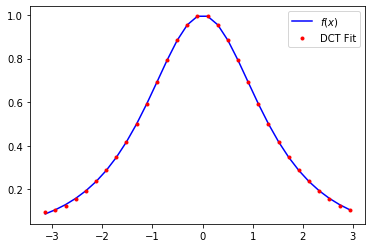

In [19]:
plt.plot(x,f,'b',x,Fc,'r.')
plt.legend(['$f(x)$','DCT Fit']);

In [20]:
S = np.sin(kx)
print('bk = {}'.format(S.dot(f)/(N-1)))

bk = [ 2.23835287e-18  4.76769162e-17  5.30489631e-17  2.16001052e-17
  0.00000000e+00 -2.16001052e-17 -5.30489631e-17 -4.76769162e-17
 -4.47670574e-19  2.23835287e-17]


[-1.  0.  1.]


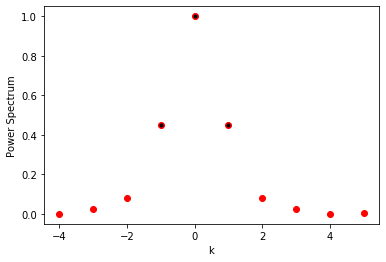

In [21]:
pwr_spectrum = np.fabs(a)
pwr_spectrum = pwr_spectrum/pwr_spectrum.max()
threshold = 0.4#0.05
kr = k[pwr_spectrum>threshold]
ar = a[pwr_spectrum>threshold]
print(kr)
plt.plot(k,pwr_spectrum,'ro',kr,pwr_spectrum[pwr_spectrum>threshold],'k.')
plt.xlabel('k')
plt.ylabel('Power Spectrum');

In [22]:
k[pwr_spectrum>threshold]

array([-1.,  0.,  1.])

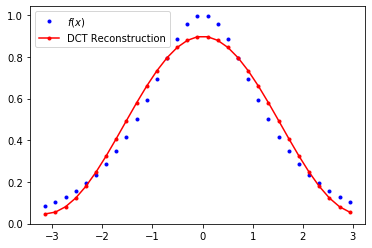

In [23]:
Cr = np.cos(np.outer(kr,x))
plt.plot(x,f,'b.',x,ar.dot(Cr),'r.-')
plt.legend(['$f(x)$','DCT Reconstruction']);

###### Or simply go back to the DCT construction and choose Nk = 3 or 4

-[back to top](#Signal-Reconstruction)

###### Exercise: What is the smallest frequency range that will provide a reasonable reconstruction of this signal? Use that frequency range to reconstruct it.

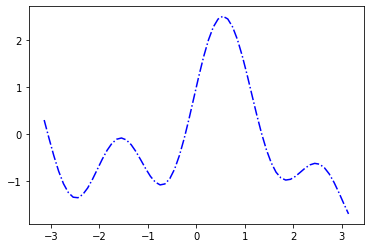

In [24]:
L = np.pi
N = 64
Nk = 16
x = np.linspace(-L,L,N)
f = np.sin(3*x/2) + np.cos(5*x/4) + np.sin(3*x) #<-- Here is the signal
plt.plot(x,f,'b-.');

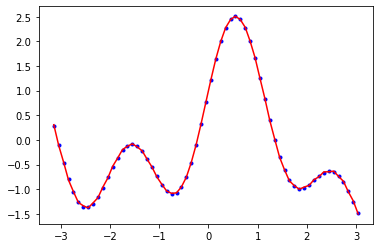

In [25]:
L = np.pi
N = 64
Nk = 64
x = np.linspace(-L,L,N) # Physical grid
f = np.sin(3*x/2) + np.cos(5*x/4) + np.sin(3*x) #<-- Here is the signal
x = x[:-1]
f = f[:-1]
k = np.arange(-Nk/2+1,Nk/2+1)
kx = np.outer(k,x)
C = np.cos(kx)
S = np.sin(kx)
a = C.dot(f)/(N-1) # Trapezoidal rule in place of matrix inversion
b = S.dot(f)/(N-1)
Fc = a.dot(C) # Cosine fit
Fs = b.dot(S) # Sine fit
F = Fc+Fs # Trigonometric interpolant
plt.plot(x,f,'b.',x,F,'r');

In [26]:
k

array([-31., -30., -29., -28., -27., -26., -25., -24., -23., -22., -21.,
       -20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
        -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.])

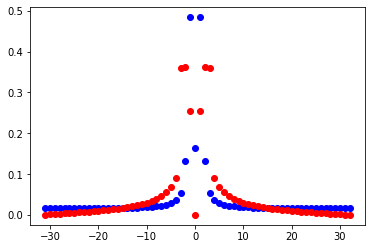

In [27]:
pwr_spectrum_a = np.fabs(a)
pwr_spectrum_b = np.fabs(b)
plt.plot(k,pwr_spectrum_a,'bo',k,pwr_spectrum_b,'ro');

In [28]:
k[pwr_spectrum_a > 0.1]

array([-2., -1.,  0.,  1.,  2.])

In [29]:
k[pwr_spectrum_b > 0.1]

array([-3., -2., -1.,  1.,  2.,  3.])

###### Remarks:
* This signal is neither even nor odd
* The DFT is required
* Check the power spectrums for both $a_k$ and $b_k$ to obtain the necessary frequencies

-[back to top](#Signal-Reconstruction)

### 